1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Eigenvalues: [ 1.96268232e+01 -1.12719656e-15  2.73650747e+00] 

Eigenvectors: [[-0.07807279  0.81649658 -0.57204718]
 [-0.62253905  0.40824829  0.66766643]
 [-0.77868464 -0.40824829 -0.47642792]] 

***********************************************************

>>Eigenvectors and Eigenvalues Using SVD:

Eigenvalues:
 [ 1.96268232e+01 -1.12719656e-15  2.73650747e+00] 
 [1.97267207e+01 2.73745440e+00 1.54908110e-30]

Eigenvectors:
 [[-0.07807279  0.81649658 -0.57204718]
 [-0.62253905  0.40824829  0.66766643]
 [-0.77868464 -0.40824829 -0.47642792]] 
 [[-0.07774434  0.57209191 -0.81649658]
 [-0.6229223  -0.66730888 -0.40824829]
 [-0.77841097  0.47687493  0.40824829]] 

**********************************************************

Main Component in Percentage: 72.86%
Two Features in Percentage: 1.00%


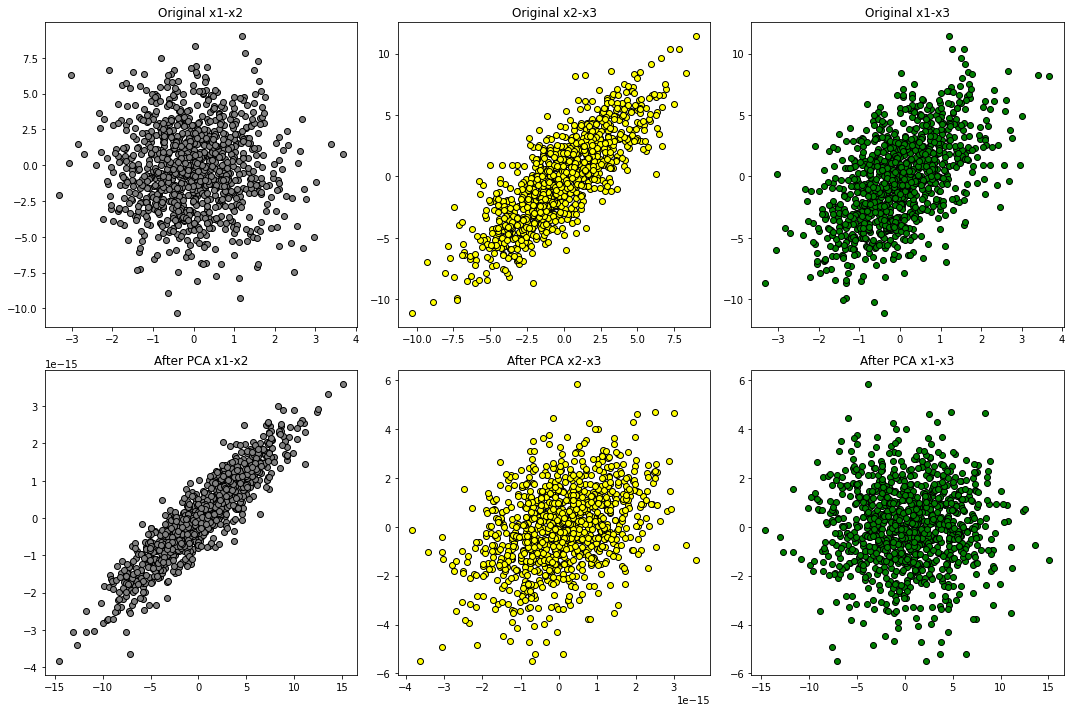

In [58]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from scipy import linalg
import matplotlib.pyplot as plt
import seaborn as sns

N = 1000

N, mu, mu2, sigma, sigma2 = 1000, 0, 0, 1, 3
x_1 = np.random.normal(loc=mu, scale=sigma, size=N)
x_2 = np.random.normal(loc=mu2, scale=sigma2, size=N)
x_3 = 2 * x_1 + x_2
X = np.array([x_1, x_2, x_3])

# Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
cover = np.cov(X)
val, vec = np.linalg.eig(cover)
print("Eigenvalues:", val, "\n")
print("Eigenvectors:", vec, "\n\n***********************************************************\n")


#Find the eigenvectors and eigenvalues using SVD.
U, D, Vt = np.linalg.svd(X)
svd = D**2 / (N - 1)
print(">>Eigenvectors and Eigenvalues Using SVD:\n\nEigenvalues:\n", val, "\n", svd)
print("\nEigenvectors:\n", vec, "\n", U, "\n\n**********************************************************\n")

print("Main Component in Percentage: %.2f%%" % ((D[0] / D.sum()) * 100))
print("Two Features in Percentage: %.2f%%" % ((D[0] + D[1]) / D.sum()))

PCA_X = np.dot(vec.T, X)

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].scatter(X[0], X[1], c='grey', edgecolors="black")
ax[0, 0].set_title('Original x1-x2')
ax[0, 1].scatter(X[1], X[2], c='yellow', edgecolors="black")
ax[0, 1].set_title('Original x2-x3')
ax[0, 2].scatter(X[0], X[2], c='green', edgecolors="black")
ax[0, 2].set_title('Original x1-x3')


ax[1, 0].scatter(PCA_X[0], PCA_X[1], c='grey', edgecolors="black")
ax[1, 0].set_title('After PCA x1-x2')
ax[1, 1].scatter(PCA_X[1], PCA_X[2], c='yellow', edgecolors="black")
ax[1, 1].set_title('After PCA x2-x3')
ax[1, 2].scatter(PCA_X[0], PCA_X[2], c='green', edgecolors="black")
ax[1, 2].set_title('After PCA x1-x3')

plt.tight_layout()
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

cov_nariance X: 
 [[ 1.02295287 -0.08542247  1.94960962]
 [-0.08542247  8.82395081  8.63305861]
 [ 1.94960962  8.63305861 12.51456546]] 

Eigenvalues:
 [1.96129106e+01+0.j 4.00734463e-03+0.j 2.74455117e+00+0.j] 

Eigenvectors:
 [[-0.07880313  0.81634473 -0.57216375]
 [-0.62245509  0.40802237  0.66788278]
 [-0.77867819 -0.40877749 -0.47598449]] 



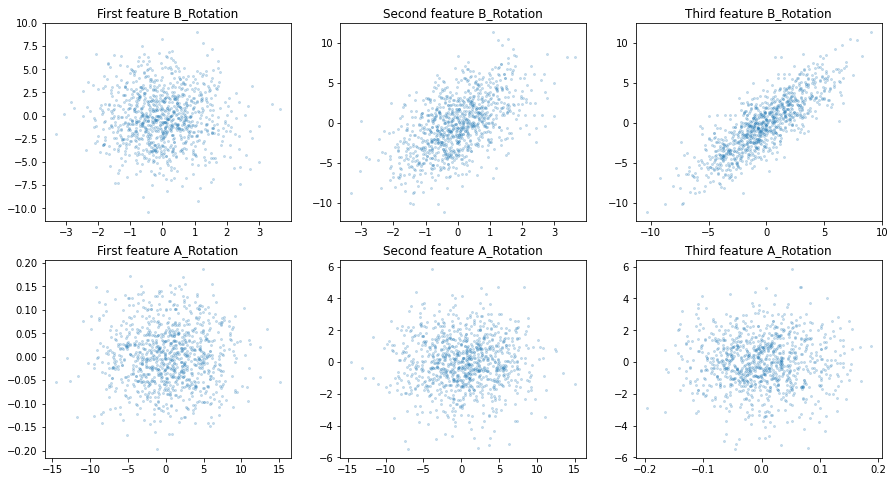

In [60]:
noise = np.random.normal(loc=0, scale=0.02, size=(3, N, 10))

Xn = X + np.sum(noise,axis=2)

#finding the eigenvalues and the eigenvectors
cov_n = np.cov(Xn)
print("cov_nariance X: \n", cov_n, '\n') 

l_n, V_n = la.eig(cov_n)
print("Eigenvalues:\n", l_n, '\n')
print("Eigenvectors:\n", V_n, '\n')

#Finding the eigenvalues and the eigenvectors with SVD
U_n, S_n, Vt_n = la.svd(cov_n)

# Rotate all the data  
Xpn = np.dot(V_n.T, Xn)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (15,8))

#First feature
axs[0,0].scatter(Xn[0], Xn[1], alpha = 0.2, s = 4)
axs[1,0].scatter(Xpn[0], Xpn[1], alpha = 0.2, s = 4)
axs[0,0].set_title("First feature B_Rotation")
axs[1,0].set_title("First feature A_Rotation")

#Second feature
axs[0,1].scatter(Xn[0], Xn[2], alpha = 0.2, s = 4)
axs[1,1].scatter(Xpn[0], Xpn[2], alpha = 0.2, s = 4)
axs[0,1].set_title("Second feature B_Rotation")
axs[1,1].set_title("Second feature A_Rotation")

#Third feature
axs[0,2].scatter(Xn[1], Xn[2], alpha = 0.2, s = 4)
axs[1,2].scatter(Xpn[1], Xpn[2], alpha = 0.2, s = 4)
axs[0,2].set_title("Third feature B_Rotation")
axs[1,2].set_title("Third feature A_Rotation")

plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [3]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 





--2023-01-18 21:32:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1.4M) [application/x-httpd-php]
Saving to: ‘data/magic04.data.5’

magic04.data.5      100%[===================>]   1.41M  3.63MB/s    in 0.4s    

2023-01-18 21:32:27 (3.63 MB/s) - ‘data/magic04.data.5’ saved [1477391/1477391]

--2023-01-18 21:32:27--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5400 (5.3K) [application/x-httpd-php]
Saving to: ‘data/magic04.names.5’

magic04.names.5     100%[===================>]   5.27K 